## Machine Learning ICW
### Jeff Mitchell
### 40203212
### jmitchell25@qub.ac.uk

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

The above cell must be executed first to prevent scrolling outputs eg. in the silhoutte analysis figures, if errors occur it can be ignored but will cause outputted plots to be placed into scrollable box

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import mean
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
import skopt.utils
from skopt import gp_minimize
from skopt.space import Real
from skopt.space import Categorical

%matplotlib inline
sns.set()

# Packages that have been installed:
# scikit-optimize
# mlxtend

In [3]:
# Import data
df_original = pd.read_csv('PanCanAtlas_9126RNASeqSamplesWithImmuneSubtypes_440Genes_SampleIdsOrdered_SampleIdWithSubtypes_RR020718_RownamesGenesWithSignature_ImputedbyMice_Updated.csv', index_col=0, low_memory=False)
df = pd.read_csv('PanCanAtlas_9126RNASeqSamplesWithImmuneSubtypes_440Genes_SampleIdsOrdered_SampleIdWithSubtypes_RR020718_RownamesGenesWithSignature_ImputedbyMice_Updated.csv', index_col=0, low_memory=False)
# Transposed data
df_original = df_original.T
df = df.T

#Last column has no name, lets rename it 'subgroups' for later
df.columns = [*df.columns[:-1], 'Subgroups']

# Save the subgroup, which is the last column of the dataset
last_n_column = df.iloc[:, -1:]
subgroup = df.iloc[:, -1:]
df
#df_TCGA.head()
#df_TCGA.tail()

,ACTL6A_S5,ADAM9_S2,ADAMTS1_S5,ADCY7_S3,AIMP2_S5,ALKBH7_S5,ALOX5AP_S3,AMPD3_S3,APITD1_S5,APOC1_S3,...,WIPF1_S3,WNT2B_S2,WNT8B_S2,WSB2_S5,ZWILCH_S5,ZYX_S2,MMP3_S2,PLG_S5,RGS8_S5,Subgroups
TCGA.02.0047.GBM.C4,745.567,4287.78,241.556,1067.64,406.736,518.148,1326.41,326.992,184.308,1370.66,...,2154.95,43.0253,0,4291.47,260.211,3867.97,0,0,46.7132,C4
TCGA.02.0055.GBM.C4,1154.31,9475.54,6098.95,556.132,537.088,942.957,4211.35,361.598,319.535,3093.48,...,1947.58,44.8493,0,2494.18,467.56,11481.4,182.761,0,0.5606,C4
TCGA.02.2483.GBM.C4,1498.68,2307.12,433.984,497.309,752.148,656.042,566.543,196.728,311.443,3504.38,...,1042.74,10.1319,0.8443,4128.76,682.242,5066.81,6.3325,0,4.2216,C4
TCGA.02.2485.GBM.C4,1320,2685.71,911.905,316.667,785.552,953.809,307.143,80,260.462,2482.86,...,849.524,18.5714,0.9524,3609.52,440.386,5090.95,2.381,0,18.0952,C4
TCGA.02.2486.GBM.C4,1404.27,2843.9,321.951,637.805,792.963,815.244,5671.95,542.683,494.488,12512.8,...,2454.88,7.3171,0.6098,2747.56,166.689,7800,3.6585,0,0,C4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.ZS.A9CE.LIHC.C4,472.648,178.884,135.667,35.558,1434.8,2168.49,1.6411,7.6586,268.643,189054,...,54.7046,1.6411,10.9409,1684.35,133.321,4041.58,0,91165.8,0,C4
TCGA.ZS.A9CF.LIHC.C4,831.151,504.48,1062.72,126.12,492.357,2356.31,50.9993,52.3777,302.839,58041.4,...,439.008,4.1351,0.6892,982.77,383.791,1172.3,0,26629.2,0,C4
TCGA.ZS.A9CG.LIHC.C3,333.162,920.651,467.524,209.769,730.687,1780.98,55.527,37.7035,284.298,155571,...,191.26,3.4276,4.7986,1372.41,97.3436,1963.32,0,125447,0,C3
TCGA.ZU.A8S4.CHOL.C1,1176.62,7189.33,512.028,933.317,479.591,860.526,445.719,236.819,316.091,1932.44,...,1917.99,5.9828,0.4986,4231.83,375.979,10561.6,15.4556,117.163,0,C1


In [4]:
# Checking for duplicate entries
# (No duplicates exists therefore commented out)
#shape_before = df.shape
#print(shape_before)
#df.drop_duplicates()
#shape_after = df.shape
#print(shape_after)

In [5]:
# Dropping the last column (subclass c1, c2 etc...)
df = df.iloc[:, :-1]
df

,ACTL6A_S5,ADAM9_S2,ADAMTS1_S5,ADCY7_S3,AIMP2_S5,ALKBH7_S5,ALOX5AP_S3,AMPD3_S3,APITD1_S5,APOC1_S3,...,WDR77_S5,WIPF1_S3,WNT2B_S2,WNT8B_S2,WSB2_S5,ZWILCH_S5,ZYX_S2,MMP3_S2,PLG_S5,RGS8_S5
TCGA.02.0047.GBM.C4,745.567,4287.78,241.556,1067.64,406.736,518.148,1326.41,326.992,184.308,1370.66,...,925.044,2154.95,43.0253,0,4291.47,260.211,3867.97,0,0,46.7132
TCGA.02.0055.GBM.C4,1154.31,9475.54,6098.95,556.132,537.088,942.957,4211.35,361.598,319.535,3093.48,...,931.184,1947.58,44.8493,0,2494.18,467.56,11481.4,182.761,0,0.5606
TCGA.02.2483.GBM.C4,1498.68,2307.12,433.984,497.309,752.148,656.042,566.543,196.728,311.443,3504.38,...,1370.77,1042.74,10.1319,0.8443,4128.76,682.242,5066.81,6.3325,0,4.2216
TCGA.02.2485.GBM.C4,1320,2685.71,911.905,316.667,785.552,953.809,307.143,80,260.462,2482.86,...,811.905,849.524,18.5714,0.9524,3609.52,440.386,5090.95,2.381,0,18.0952
TCGA.02.2486.GBM.C4,1404.27,2843.9,321.951,637.805,792.963,815.244,5671.95,542.683,494.488,12512.8,...,954.878,2454.88,7.3171,0.6098,2747.56,166.689,7800,3.6585,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.ZS.A9CE.LIHC.C4,472.648,178.884,135.667,35.558,1434.8,2168.49,1.6411,7.6586,268.643,189054,...,870.35,54.7046,1.6411,10.9409,1684.35,133.321,4041.58,0,91165.8,0
TCGA.ZS.A9CF.LIHC.C4,831.151,504.48,1062.72,126.12,492.357,2356.31,50.9993,52.3777,302.839,58041.4,...,523.087,439.008,4.1351,0.6892,982.77,383.791,1172.3,0,26629.2,0
TCGA.ZS.A9CG.LIHC.C3,333.162,920.651,467.524,209.769,730.687,1780.98,55.527,37.7035,284.298,155571,...,454.499,191.26,3.4276,4.7986,1372.41,97.3436,1963.32,0,125447,0
TCGA.ZU.A8S4.CHOL.C1,1176.62,7189.33,512.028,933.317,479.591,860.526,445.719,236.819,316.091,1932.44,...,1102.83,1917.99,5.9828,0.4986,4231.83,375.979,10561.6,15.4556,117.163,0


In [6]:
# Scaling data to range between 0 and 1 before using PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Df_scaled is now an numpy array, needs converted to dataframe
#df_scaled
# Ignore scaler for now, explanation later

In [7]:
# Convert array back to dataframe
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,-0.558906,0.420487,-0.611189,0.704905,-0.687985,-0.512173,1.946484,-0.156400,-0.699438,-0.145756,...,-0.056259,1.032485,-0.159936,-0.184196,2.714238,-0.593039,-0.240710,-0.214910,-0.178617,4.893158
1,-0.167994,2.266960,2.262900,-0.234333,-0.280997,0.009333,7.823385,-0.070830,0.245812,-0.102989,...,-0.045841,0.811120,-0.151350,-0.184196,0.569731,0.086213,2.321818,-0.123127,-0.178617,-0.083107
2,0.161352,-0.284486,-0.516769,-0.342345,0.390466,-0.342891,0.398561,-0.478505,0.189248,-0.092789,...,0.700061,-0.154788,-0.314786,-0.133087,2.520095,0.789487,0.162795,-0.211730,-0.178617,0.311629
3,-0.009533,-0.149735,-0.282264,-0.674042,0.494761,0.022655,-0.129861,-0.767140,-0.167114,-0.118147,...,-0.248237,-0.361044,-0.275056,-0.126543,1.900543,-0.002806,0.170920,-0.213714,-0.178617,1.807509
4,0.071061,-0.093431,-0.571741,-0.084364,0.517899,-0.147451,10.798768,0.376941,1.468750,0.130836,...,-0.005636,1.352657,-0.328038,-0.147282,0.872061,-0.899406,1.082733,-0.213073,-0.178617,-0.143552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,-0.819919,-1.041986,-0.663147,-1.190218,2.521853,1.513826,-0.752198,-0.946019,-0.109928,4.513287,...,-0.149066,-1.209505,-0.354758,0.478102,-0.396549,-1.008716,-0.182277,-0.214910,9.591800,-0.143552
9122,-0.477055,-0.926097,-0.208263,-1.023927,-0.420657,1.744398,-0.651651,-0.835442,0.129105,1.261036,...,-0.738311,-0.799265,-0.343017,-0.142475,-1.233667,-0.188205,-1.148019,-0.214910,2.675287,-0.143552
9123,-0.953320,-0.777970,-0.500312,-0.870330,0.323460,1.038110,-0.642427,-0.871727,-0.000498,3.682106,...,-0.854693,-1.063734,-0.346348,0.106283,-0.768753,-1.126574,-0.881778,-0.214910,13.265783,-0.143552
9124,-0.146658,1.453232,-0.478475,0.458259,-0.460515,-0.091862,0.152431,-0.379372,0.221738,-0.131811,...,0.245413,0.779533,-0.334319,-0.154013,2.643077,-0.213796,2.012232,-0.207148,-0.166060,-0.143552


### Section A: PCA Analysis

In [8]:
# PCA analysis
df_pca = PCA()
df_pca.fit_transform(df)

array([[-5.29732801e+04,  7.49762059e+03,  1.33338149e+04, ...,
        -2.51777818e+01, -3.99274504e+00,  3.60847991e+01],
       [ 1.70512602e+05,  7.46227078e+03,  9.04611632e+03, ...,
        -1.74367548e+01, -2.29494402e+00, -5.25609117e+00],
       [-6.91011632e+04, -6.22590836e+03,  4.95931723e+02, ...,
         2.97213312e+01, -4.06576548e+00,  2.16971218e+00],
       ...,
       [-2.49014144e+04, -1.07880797e+05,  2.35747319e+05, ...,
         1.13813827e+01,  5.49401341e+00,  1.03036628e-01],
       [ 2.06738996e+05, -2.14494477e+05, -2.59489519e+04, ...,
        -3.37012435e+01, -2.20122899e-01, -1.73715020e+00],
       [-1.42761775e+04,  5.77285955e+04, -1.47750054e+04, ...,
         2.07841125e+01, -3.70858236e+00, -1.92449651e+00]])

In [9]:
# Looking at variance explained by each of the 440 components
# Only printing the variances for the first 10 components
# df_pca.explained_variance_ratio_
df_pca.explained_variance_ratio_[0:10]

# Explained variance of the first, second and third components are:
# 43.258%, 22.887% and 7.883%
# Total: 74.058%

array([0.43258132, 0.22887333, 0.07882862, 0.04048689, 0.02996966,
       0.02689753, 0.01964039, 0.01640533, 0.01469692, 0.01160259])

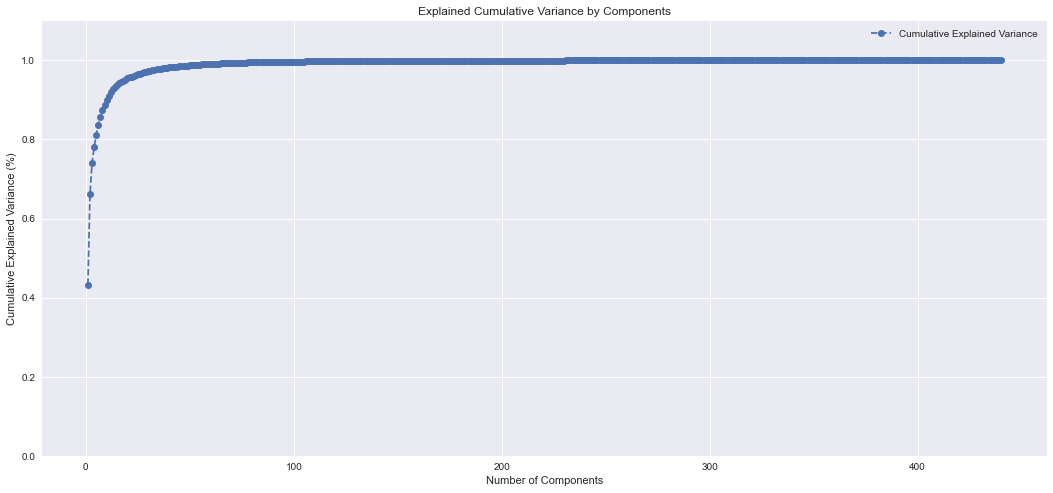

In [10]:
# Plotting explained cumulative variance by components
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (18, 8)
plt.plot(range(1,441),
         df_pca.explained_variance_ratio_.cumsum(),
         marker = 'o',
         linestyle = '--',
         color = 'b',
         label = 'Cumulative Explained Variance')
plt.title('Explained Cumulative Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.ylim([0, 1.1])
plt.legend()
plt.show()

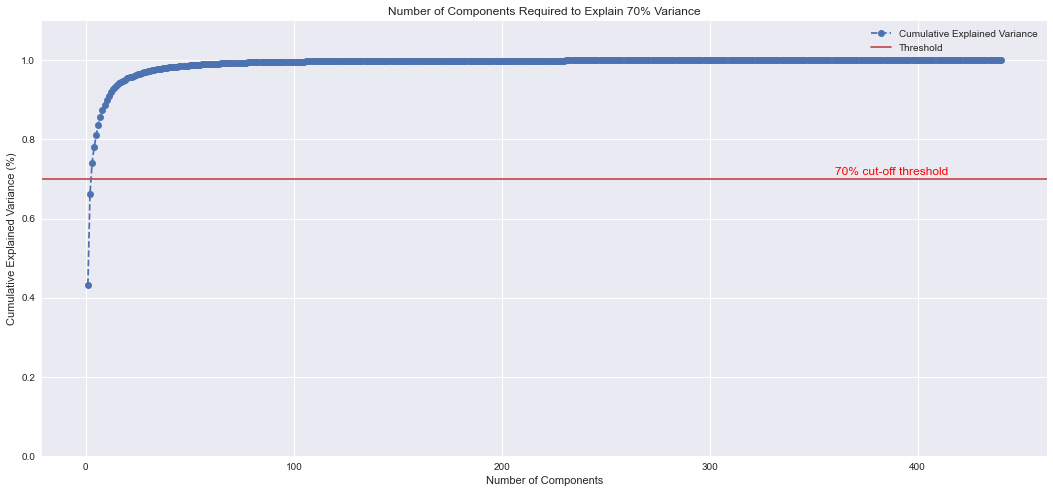

In [11]:
# Finding the number of components for 70% cut-off threshold of cumulative variance
pca = PCA()
pca.fit_transform(df)
pca = df_pca.fit(df)

# Plotting explained cumulative variance by components
# With 70% threshold cut-off line
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (18, 8)
fig, ax =  plt.subplots()
xi = np.arange(1, 441, step=1)
y = pca.explained_variance_ratio_.cumsum()

plt.ylim(0.0, 1.1)
plt.plot(xi,
         y,
         marker = 'o',
         linestyle = '--',
         color = 'b',
         label = 'Cumulative Explained Variance')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.ylim([0, 1.1])
plt.title('Number of Components Required to Explain 70% Variance')

plt.axhline(y=0.70, color='r', linestyle='-', label='Threshold')
plt.text(360, 0.71, '70% cut-off threshold', color='red', fontsize=12)

plt.legend()
plt.show()

In [12]:
# Visually from the graph we can see that around 3 components are needed to reach the threshold
# Below we can figure out exactly how many components are needed
# Calling pca with n_components=0.7 for 70% variance
df_pca = PCA(n_components=0.7)
pca_result = df_pca.fit_transform(df)

# Looking at the shape of the data after pca
# It was (9126, 440) before pca
print('Shape of df: ' + repr(df.shape))
# It is now (9126, 39) after pca
print('Shape of df_pca: ' + repr(pca_result.shape))

Shape of df: (9126, 440)
Shape of df_pca: (9126, 3)


This confirms that 3 components are required to keep 70% of the variance of the original dataset

In [13]:
# PCA with 3 components
pca = PCA(n_components=3)
plot_pca = pca.fit_transform(df)
#print(plot_pca)


# Separating pca components
pca1 = plot_pca[:, 0]
pca2 = plot_pca[:, 1]
pca3 = plot_pca[:, 2]

# Colouring subgroups to colours as required
subgroup = subgroup.replace(['C1'],'red')
subgroup = subgroup.replace(['C2'],'yellow')
subgroup = subgroup.replace(['C3'],'green')
subgroup = subgroup.replace(['C4'],'cyan')
subgroup = subgroup.replace(['C5'],'blue')
subgroup = subgroup.replace(['C6'],'purple')

# Converting color dataframe to flat array
subgroup = subgroup.to_numpy()
subgroup = subgroup.flatten()
#print(subgroup)

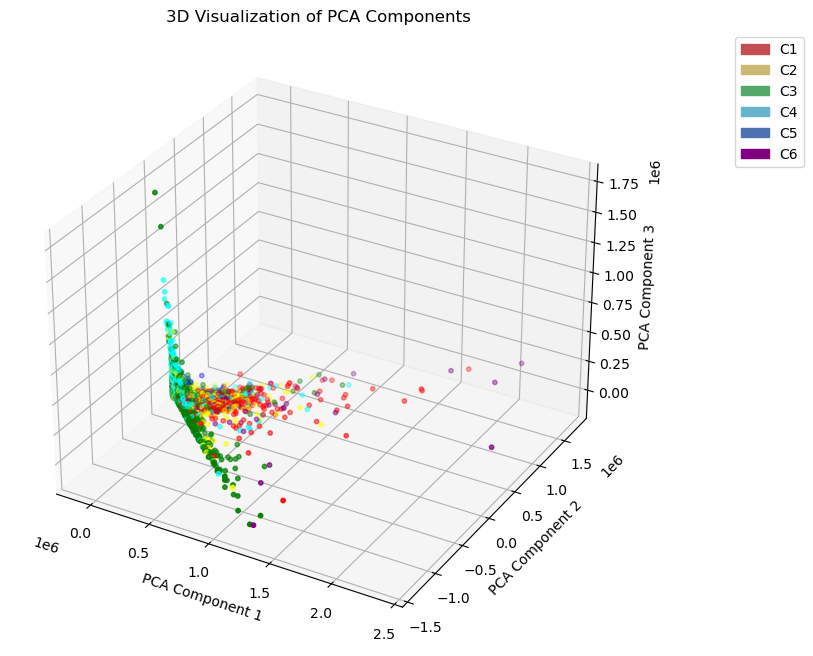

In [14]:
# 3D visualisation of PCA components
plt.style.use('default')
fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(projection='3d')

plt.title('3D Visualization of PCA Components')
ax.scatter(pca1, pca2, pca3, c=subgroup, s=10)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Set up subgroup labels manually
colors = ["r", "y", "g",
          "c", "b", "purple"]
texts = ["C1", "C2", "C3",
         "C4", "C5", "C6"]

# Manually add labels to legend
patches = [mpatches.Patch(color=colors[i], label="{:s}".format(texts[i])) for i in range(len(texts))]
plt.legend(handles=patches, bbox_to_anchor=(1.3, 1), ncol=1)
plt.show()

In [15]:
# K-Means clustering analysis
# How many consistent clusters we will have for this dataset?
# We test the algorithm with up to 10 clusters
# We fit K-Means using the transformed data from the PCA analysis
wcss = []

for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=222)
    kmeans_pca.fit_transform(plot_pca)
    wcss.append(kmeans_pca.inertia_)

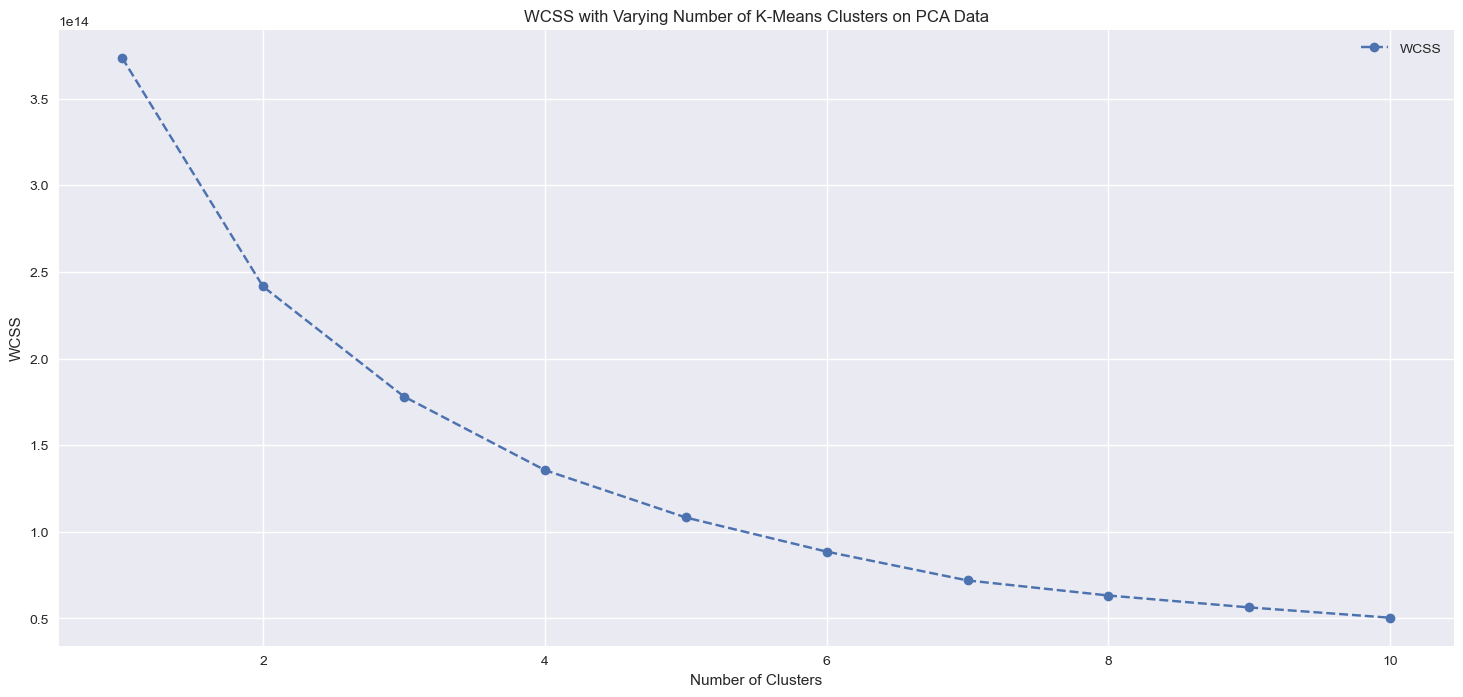

In [16]:
# Plotting WCSS vs. number of K-Means clusters
plt.figure(figsize = (18,8))
plt.style.use('seaborn')
plt.plot(range(1,11),
         wcss,
         marker = 'o',
         linestyle = '--',
         label = 'WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS with Varying Number of K-Means Clusters on PCA Data')
plt.legend()
plt.show()
# Notice the 1e14 scale on the WCSS score

By looking at the above graph, it may be difficult to identify the number of clusters using the elbow method approach on the elbow graph (possibly 2, 3 or 4 clusters). Let's also look at the silhouette score method to identify the ideal number of clusters

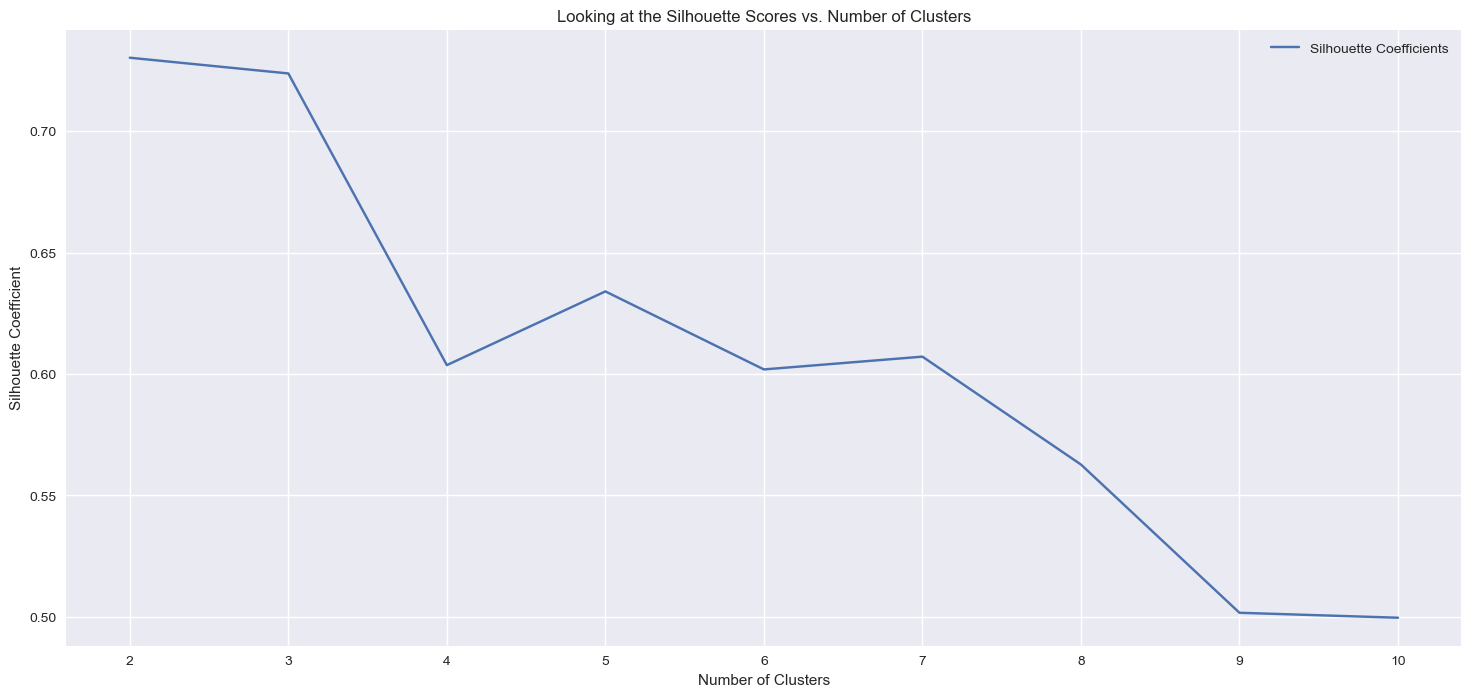

In [17]:
# List with the silhouette coefficients for each k
silhouette_coefficients = []
# Starting at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=222)
    kmeans.fit(plot_pca)
    score = silhouette_score(plot_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize = (18, 8))
plt.style.use("seaborn")
plt.title('Looking at the Silhouette Scores vs. Number of Clusters')
plt.plot(range(2, 11), silhouette_coefficients, label='Silhouette Coefficients')
#plt.xticks(range(2, 11, 2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7301882473611641
For n_clusters = 3 The average silhouette_score is : 0.7237131421416458
For n_clusters = 4 The average silhouette_score is : 0.6036448020012062
For n_clusters = 5 The average silhouette_score is : 0.6339936093146092
For n_clusters = 6 The average silhouette_score is : 0.6018773356536943


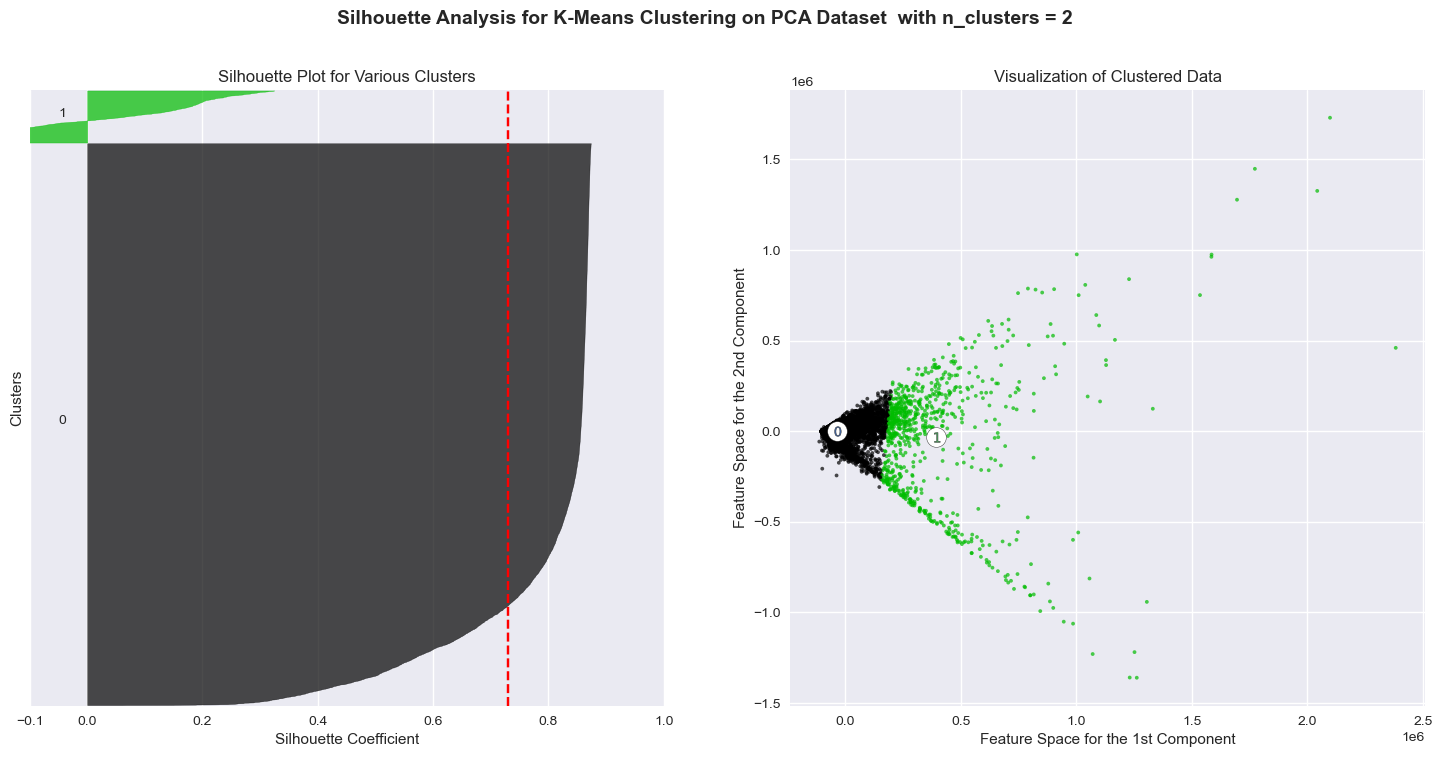

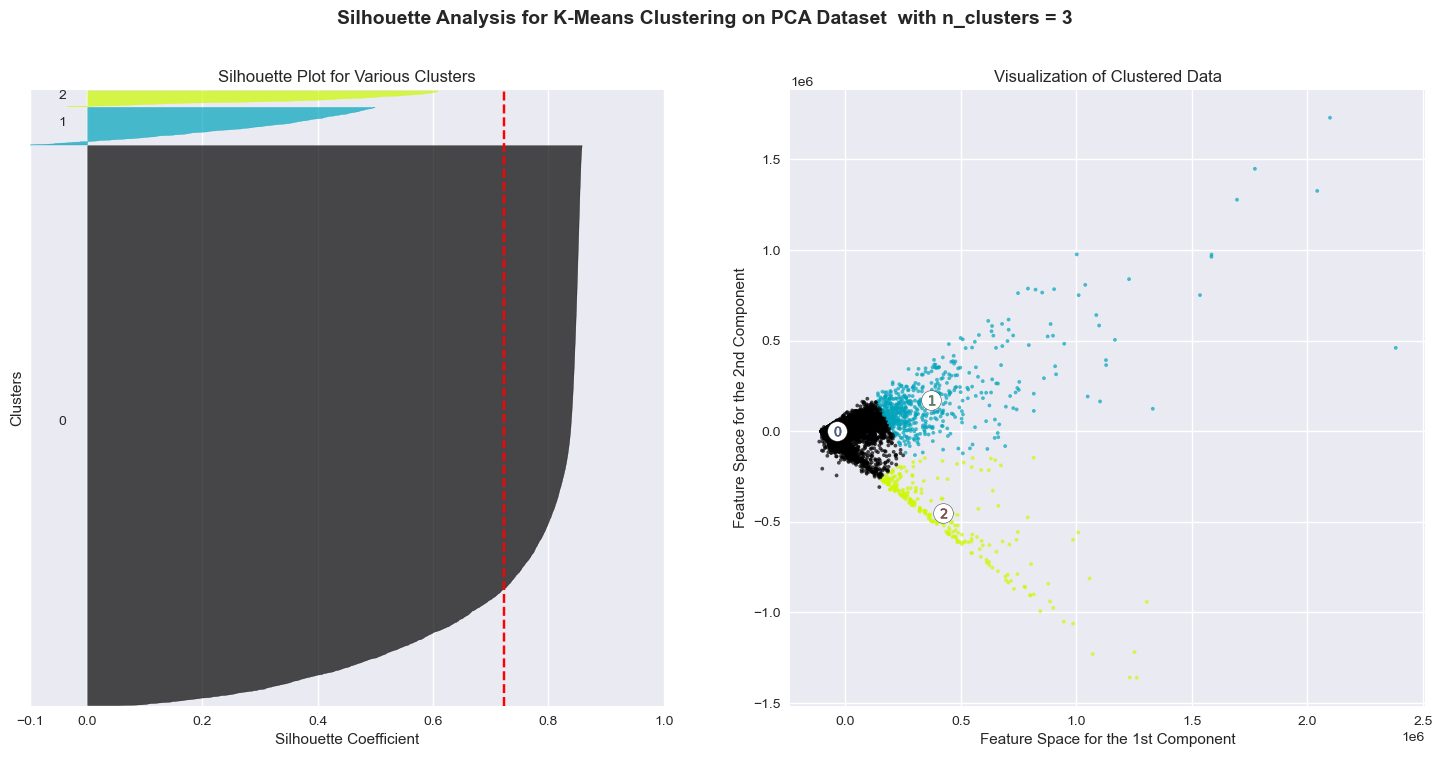

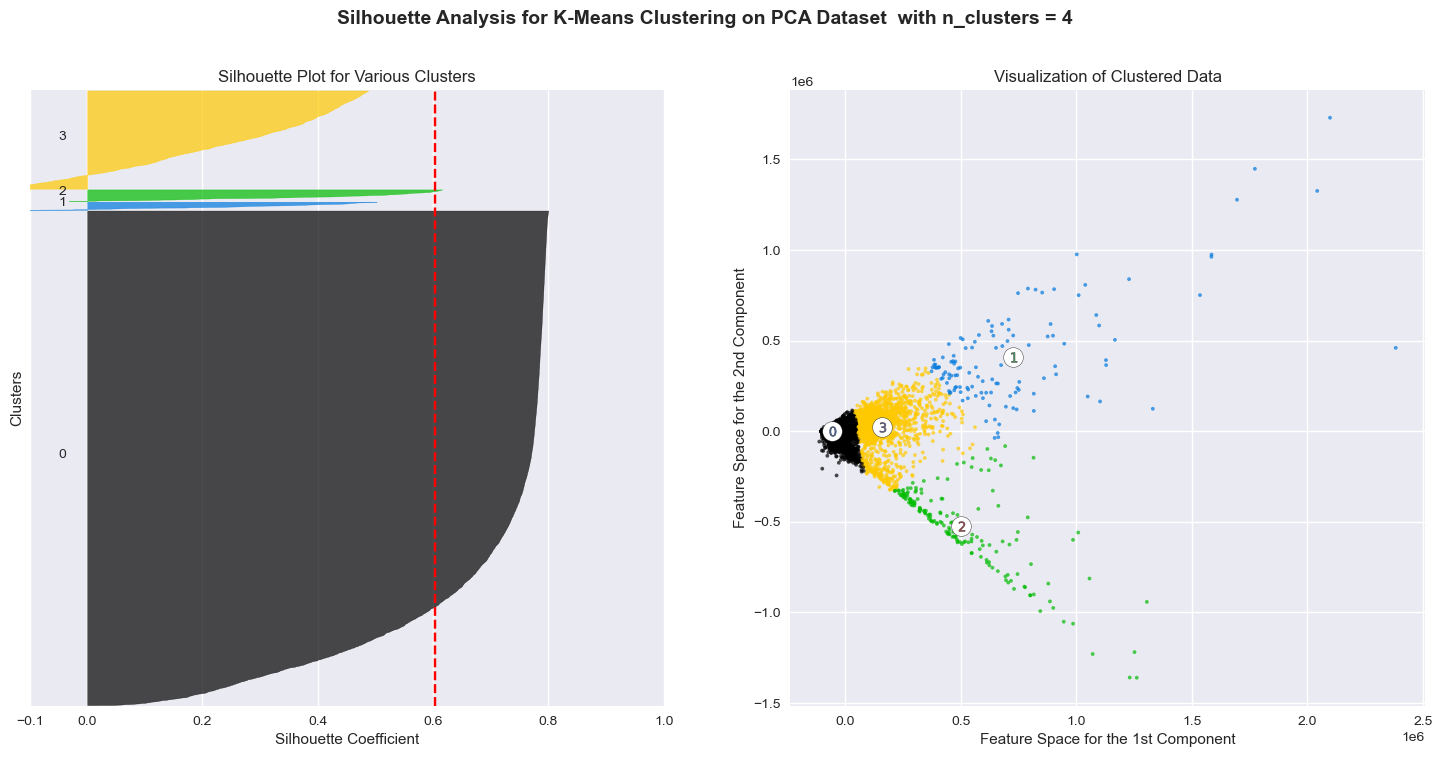

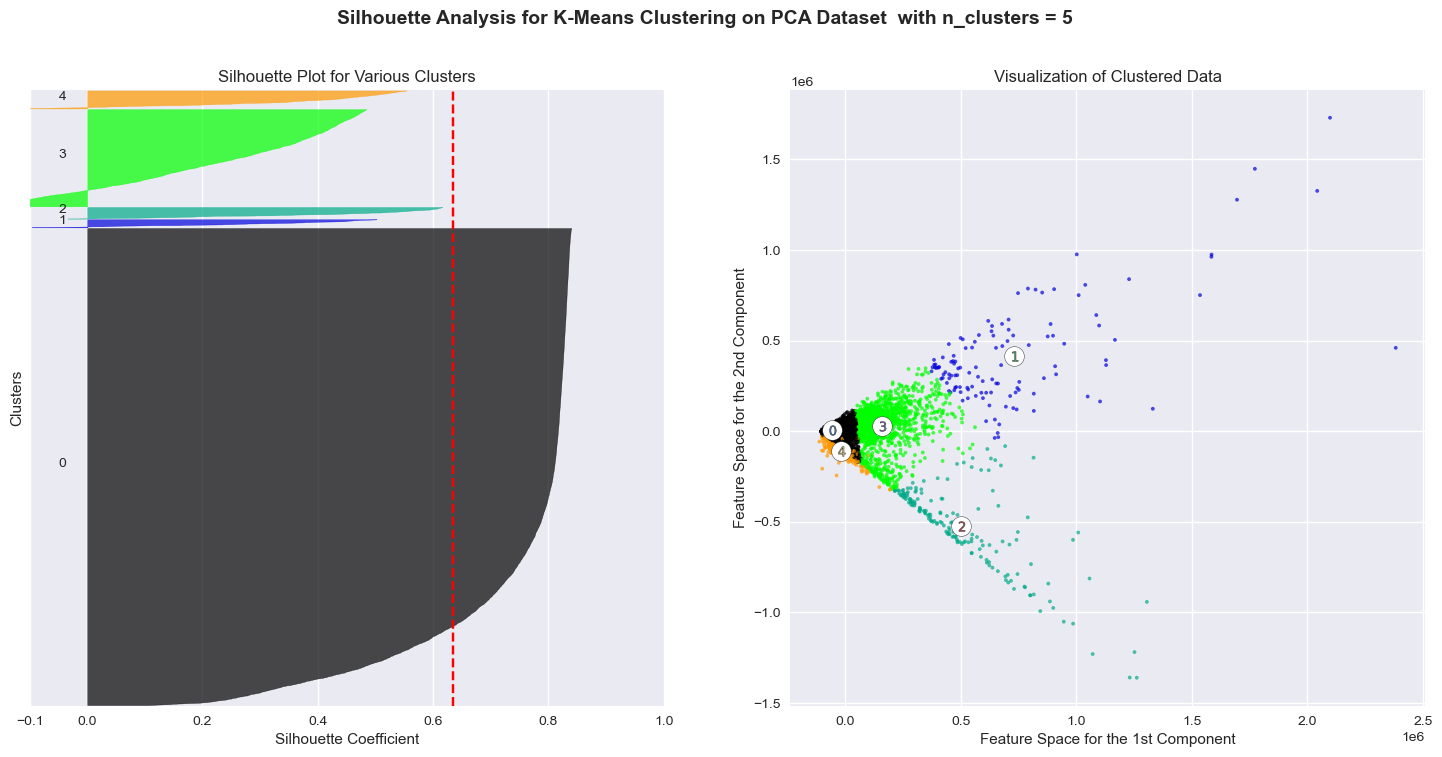

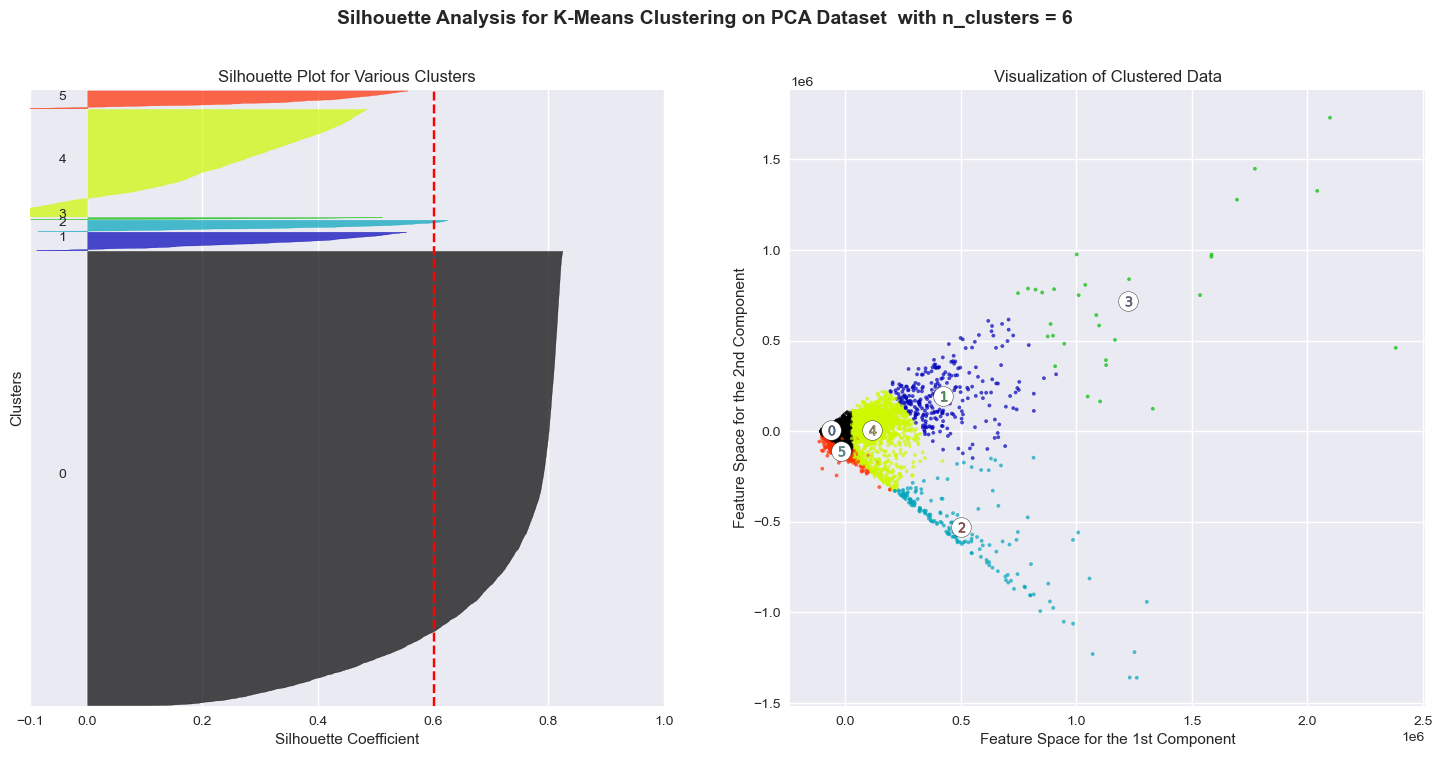

In [18]:
# Silhouette analysis
clusters = range(2, 7, 1)
# Setting up loop
for n_clusters in clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot, the silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to show them clearly.
    ax1.set_ylim([0, len(plot_pca) + (n_clusters + 1) * 10])

    # Initialize the clf with n_clusters value and a random state
    clf = KMeans(n_clusters=n_clusters, random_state=222)
    cluster_labels = clf.fit_predict(plot_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(plot_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(plot_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot for Various Clusters")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Clusters")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(plot_pca[:, 0], plot_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clf.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of Clustered Data")
    ax2.set_xlabel("Feature Space for the 1st Component")
    ax2.set_ylabel("Feature Space for the 2nd Component")

    plt.suptitle(("Silhouette Analysis for K-Means Clustering on PCA Dataset  "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

#code adapted from
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

The silhouette method suggests that 3 or 4 clusters are ideal for this model, while the elbow model suggest 2 or 3 clusters. However, we do know that the dataset classifies the data into 6 subgroups (C1-C6). This means that we are going to use 6 K-Means clusters since we know that there should be 6 distinct groups of data (clusters)

In [19]:
# Calling K-Means with 6 clusters on PCA data
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=222)
kmeans_pca.fit(plot_pca)

KMeans(n_clusters=6, random_state=222)

In [20]:
# Create a new dataframe including three components
# Add kmeans cluster labels to df
df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(plot_pca)], axis=1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_pca_kmeans['Cluster K-means PCA'] = kmeans_pca.labels_
df_pca_kmeans

,ACTL6A_S5,ADAM9_S2,ADAMTS1_S5,ADCY7_S3,AIMP2_S5,ALKBH7_S5,ALOX5AP_S3,AMPD3_S3,APITD1_S5,APOC1_S3,...,WSB2_S5,ZWILCH_S5,ZYX_S2,MMP3_S2,PLG_S5,RGS8_S5,Component 1,Component 2,Component 3,Cluster K-means PCA
0,745.567,4287.78,241.556,1067.64,406.736,518.148,1326.41,326.992,184.308,1370.66,...,4291.47,260.211,3867.97,0,0,46.7132,-52973.280115,7497.620593,13333.814958,0
1,1154.31,9475.54,6098.95,556.132,537.088,942.957,4211.35,361.598,319.535,3093.48,...,2494.18,467.56,11481.4,182.761,0,0.5606,170512.601763,7462.270784,9046.116395,4
2,1498.68,2307.12,433.984,497.309,752.148,656.042,566.543,196.728,311.443,3504.38,...,4128.76,682.242,5066.81,6.3325,0,4.2216,-69101.163208,-6225.908360,495.931741,0
3,1320,2685.71,911.905,316.667,785.552,953.809,307.143,80,260.462,2482.86,...,3609.52,440.386,5090.95,2.381,0,18.0952,-76415.000088,-5816.783311,4558.077473,0
4,1404.27,2843.9,321.951,637.805,792.963,815.244,5671.95,542.683,494.488,12512.8,...,2747.56,166.689,7800,3.6585,0,0,-72113.903602,-6418.047336,42276.014355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,472.648,178.884,135.667,35.558,1434.8,2168.49,1.6411,7.6586,268.643,189054,...,1684.35,133.321,4041.58,0,91165.8,0,-36671.714021,-139445.784893,585007.333153,5
9122,831.151,504.48,1062.72,126.12,492.357,2356.31,50.9993,52.3777,302.839,58041.4,...,982.77,383.791,1172.3,0,26629.2,0,-19177.666789,-90917.230293,56508.166754,0
9123,333.162,920.651,467.524,209.769,730.687,1780.98,55.527,37.7035,284.298,155571,...,1372.41,97.3436,1963.32,0,125447,0,-24901.414415,-107880.796790,235747.319175,5
9124,1176.62,7189.33,512.028,933.317,479.591,860.526,445.719,236.819,316.091,1932.44,...,4231.83,375.979,10561.6,15.4556,117.163,0,206738.995512,-214494.477038,-25948.951825,4


In [21]:
# Mapping clusters labels onto kmeans labels
df_pca_kmeans['Cluster'] = df_pca_kmeans['Cluster K-means PCA'].map({0:'C1',
                                                                     1:'C2',
                                                                     2:'C3',
                                                                     3:'C4',
                                                                     4:'C5',
                                                                     5:'C6'})

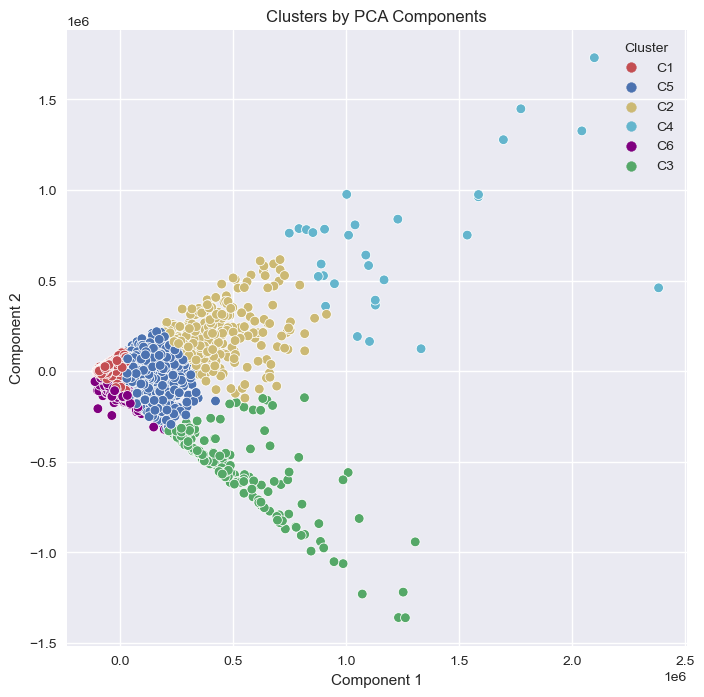

In [22]:
# Visualising identified clusters by components
x_axis = df_pca_kmeans['Component 1']
y_axis = df_pca_kmeans['Component 2']
plt.figure(figsize=(8, 8))
plt.style.use('seaborn')
sns.scatterplot(x=x_axis,
                y=y_axis,
                hue = df_pca_kmeans['Cluster'],
                palette = ['r','b','y','c','purple','g'])
plt.title('Clusters by PCA Components')
plt.show()

We can see that the above visualisation of the data and clusters matches the graph that was generated when we were doing our silhouette score analysis. The 3D visualisation that was also generated before our analysis matches, as it is 3 dimensional if we pretended to look down at the 3D graph from above we would see the 2D representation of the data which is shown above.

In [23]:
# Confusion matrix for K_eans
# As expected all samples were correctly classified
# since no actual prediction or testing is happening
print(confusion_matrix(df_pca_kmeans['Cluster K-means PCA'], kmeans_pca.labels_))

[[6780    0    0    0    0    0]
 [   0  276    0    0    0    0]
 [   0    0  169    0    0    0]
 [   0    0    0   30    0    0]
 [   0    0    0    0 1604    0]
 [   0    0    0    0    0  267]]


In [24]:
# The silhouette_score gives the average value for all the samples
# This give a perspective into the density and separation of the formed clusters

# Calling KMeans with 6 clusters
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=222)
cluster_labels = kmeans_pca.fit_predict(plot_pca)

silhouette_avg = silhouette_score(plot_pca, cluster_labels)
print('For kmeans n_clusters = 6 and PCA on the data, the average silhouette_score is: ', silhouette_avg)

# Computing silhouette scores for each sample
# Silhouette score with 6 clusters and PCA scores
pca_sample_silhouette_values = silhouette_samples(plot_pca, cluster_labels)
print('Silhouette scores of each sample: ', pca_sample_silhouette_values)

For kmeans n_clusters = 6 and PCA on the data, the average silhouette_score is:  0.6018773356536943
Silhouette scores of each sample:  [0.74836054 0.47045861 0.79724432 ... 0.47427094 0.25974371 0.50626559]


In [25]:
# The silhouette_score gives the average value for all the samples
# This give a perspective into the density and separation of the formed clusters

# Calling kmeans with 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=222)
cluster_labels_scaled = kmeans.fit_predict(df)

silhouette_avg = silhouette_score(df, cluster_labels_scaled)
print('For kmeans n_clusters = 6 on the unscaled data, the average silhouette_score is: ', silhouette_avg)

# Computing silhouette scores for each sample
# Silhouette scores with 4 clusters and only scaled data
scaled_sample_silhouette_values = silhouette_samples(df, cluster_labels_scaled)
print('Silhouette scores of each unscaled sample: ', scaled_sample_silhouette_values)

For kmeans n_clusters = 6 on the unscaled data, the average silhouette_score is:  0.34088339893946235
Silhouette scores of each unscaled sample:  [0.36481114 0.23987284 0.51301093 ... 0.28424132 0.19797104 0.32918346]


Obviously the silhouette score for the 6 cluster K-Means and PCA is 0.60, compared to the score of the only unscaled data which is 0.34.
This means that not scaling the data significantly makes identifying clusters much more difficult. Re-running the PCA analysis on the unscaled data, 39 components are now required to preserve 70% variance.
The scaler was ignored at the start as we started with PCA and used `pca.fit_transform()` which automatically transforms (scales) the data to have a mean of 0 and variance of 1 instead of `pca.fit()` which does not alter the data.

# Section B: K-Nearest Neighbours Analysis

In [26]:
# Separating features and target
X = df_scaled
# Flattening the targets to a numpy array to avoid errors
y = last_n_column.to_numpy()
y = y.flatten()

# Train test split with 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=222)

In [27]:
# KNN classifier and fit with 5 neighbors
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Predicting y_test values
y_pred = clf.predict(X_test)

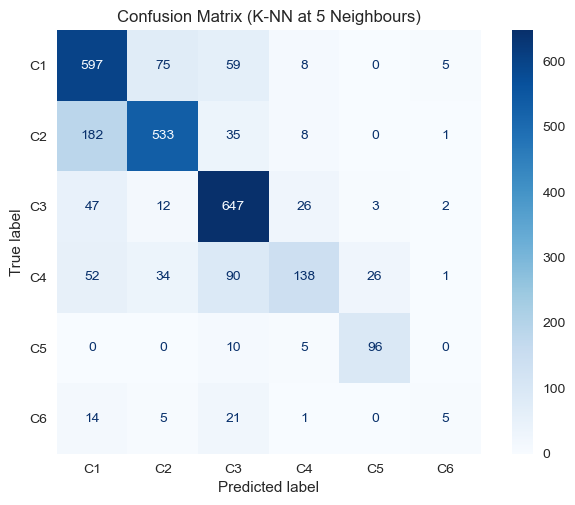

              precision    recall  f1-score   support

          C1       0.67      0.80      0.73       744
          C2       0.81      0.70      0.75       759
          C3       0.75      0.88      0.81       737
          C4       0.74      0.40      0.52       341
          C5       0.77      0.86      0.81       111
          C6       0.36      0.11      0.17        46

    accuracy                           0.74      2738
   macro avg       0.68      0.63      0.63      2738
weighted avg       0.74      0.74      0.73      2738

Classifier Model Score for KNN (5 Neighbors): 0.7363038714390066


In [28]:
# Confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
display = plot_confusion_matrix(clf, X_test, y_test,
                                display_labels=['C1','C2','C3','C4','C5','C6'],
                                cmap=plt.cm.Blues,
                                normalize=None)
display.ax_.set_title("Confusion Matrix (K-NN at 5 Neighbours)")
plt.grid(False)
plt.show()

print(classification_report(y_test, y_pred, zero_division=1))
print('Classifier Model Score for KNN (5 Neighbors): ' + repr(clf.score(X_test, y_test)))

# Model score with the unscaled dataframe and 5 neighbours is 68.5%
# Model score with the scaled dataframe and 5 neighbours is 73.6%

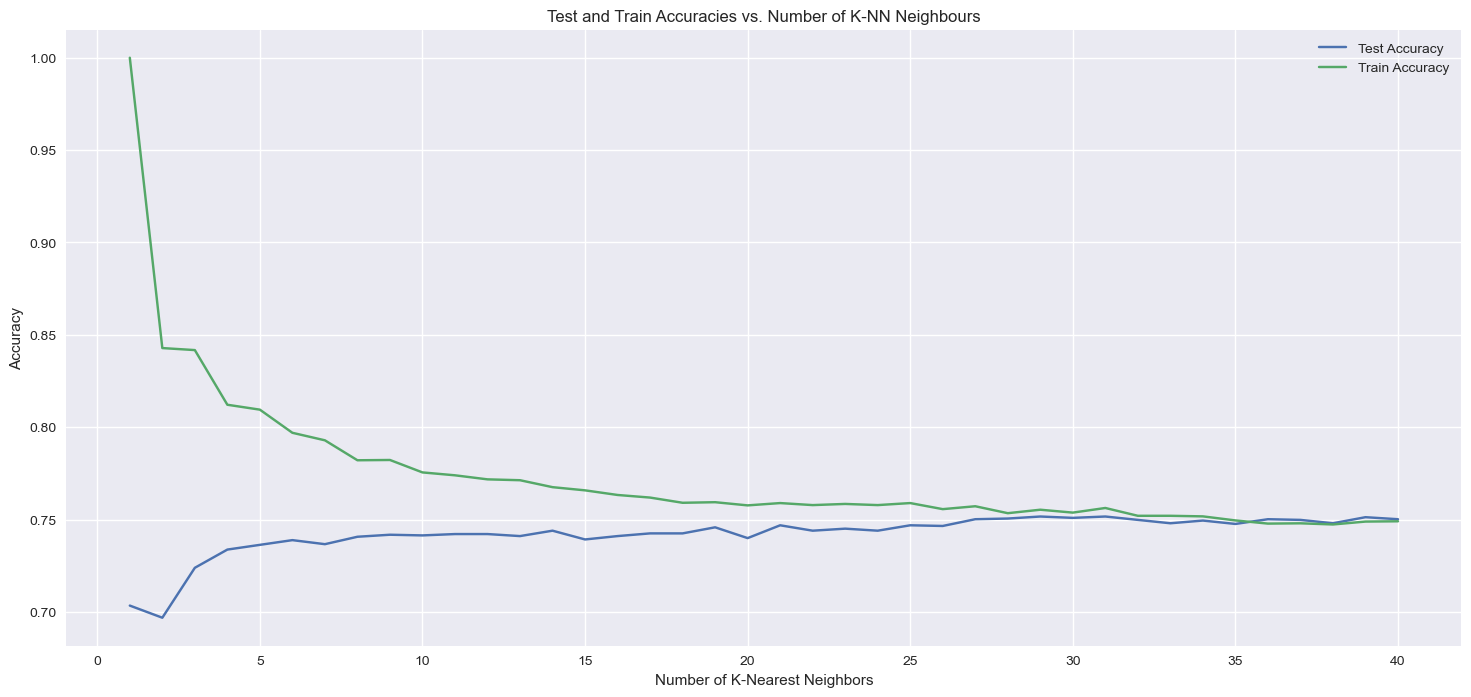

In [29]:
# WARNING: this cell takes a little longer to compute than the rest
# Applying K-NN to the dataset with varying number of neighbours
neighbors = np.arange(1, 41)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Setting up loop
for i, k in enumerate(neighbors):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    #Calculating scores
    train_accuracy[i] = clf.score(X_train, y_train)
    test_accuracy[i] = clf.score(X_test, y_test)

# Plotting of K-NN neighbours and train/test accuracy
plt.figure(figsize=(18,8))
plt.title('Test and Train Accuracies vs. Number of K-NN Neighbours')
plt.plot(neighbors, test_accuracy, label='Test Accuracy', color='b')
plt.plot(neighbors, train_accuracy, label='Train Accuracy', color='g')
plt.legend()
plt.xlabel('Number of K-Nearest Neighbors')
plt.ylabel('Accuracy')
plt.show()

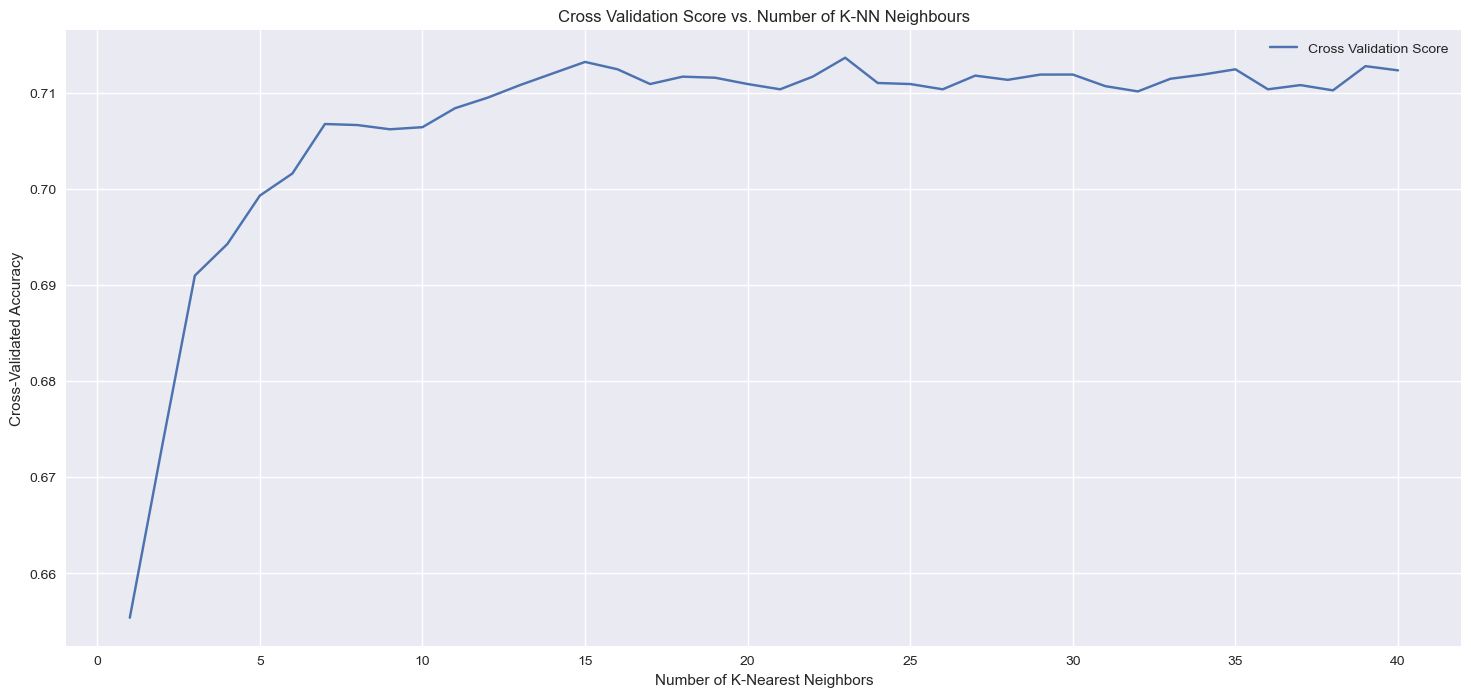

In [30]:
# WARNING: this cell takes a little longer to compute than the rest
# Applying K-NN and cross validation to measure cross validation accuracy

neighbors = range(1,41)
k_scores = []

# Setting up loop
for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting of Cross Validation score and K-NN neighbours
plt.figure(figsize=(18, 8))
plt.title('Cross Validation Score vs. Number of K-NN Neighbours')
plt.plot(neighbors, k_scores, label='Cross Validation Score', color='b')
plt.legend()
plt.xlabel('Number of K-Nearest Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

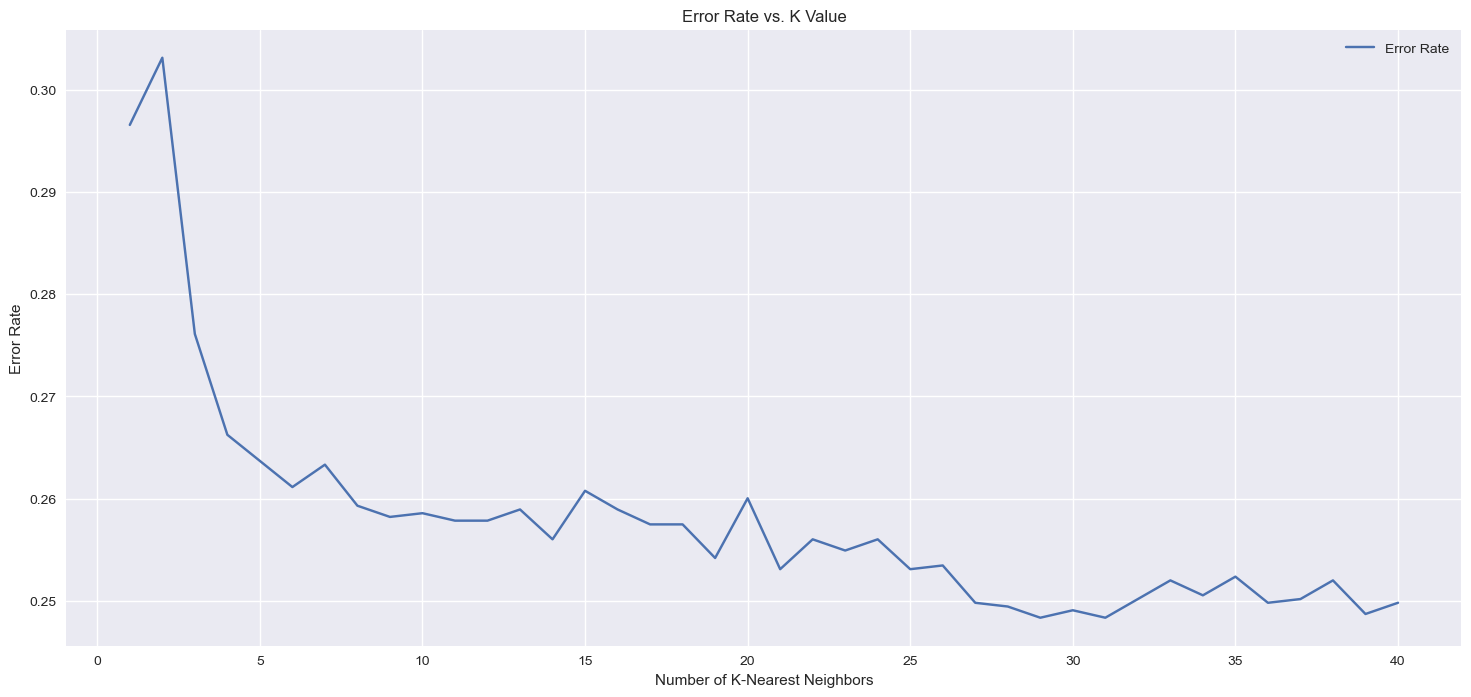

In [31]:
# WARNING: this cell takes a little longer to compute than the rest
# Measuring error rate over varying K-NN neighbours
error_rate = []
neighbors = range(1,41)

for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(18, 8))
plt.plot(neighbors, error_rate, color='b', label='Error Rate')
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of K-Nearest Neighbors')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

The three above graphs not only shows us how the training and testing scores of the model changes as the number of neighbours of the K-NN classifier increases, We can also infer the variance and bias trade off. Looking at the left-most side of the firstgraph we can see a very big gap between the two lines - this indicates high variance, moving further along the graph we can see the line begin to move closer and closer to each other. The closer that these lines are together the variance decreases and the model becomes a better fit to the dataset. The second and third graphs visualise the error rates and cross validation scores over a range of different K-Nearest Neighbours values. We want to pick our number of neighbours based on the lowest error rate, highest cross-validation score without overfitting the model or making the bias too large.

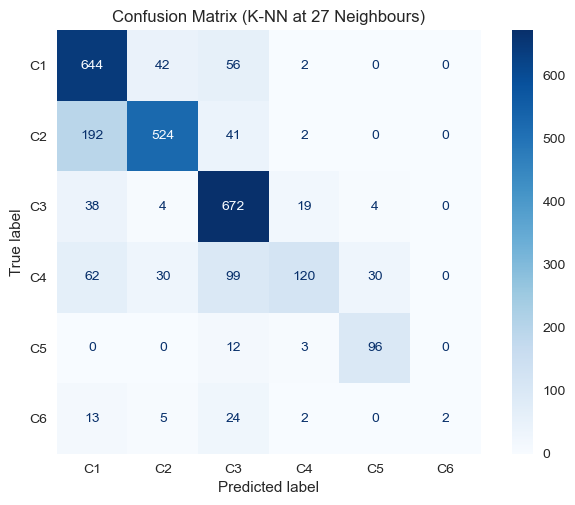

              precision    recall  f1-score   support

          C1       0.68      0.87      0.76       744
          C2       0.87      0.69      0.77       759
          C3       0.74      0.91      0.82       737
          C4       0.81      0.35      0.49       341
          C5       0.74      0.86      0.80       111
          C6       1.00      0.04      0.08        46

    accuracy                           0.75      2738
   macro avg       0.81      0.62      0.62      2738
weighted avg       0.77      0.75      0.73      2738

Classifier Model Score for KNN (27 Neighbors): 0.7516435354273192


In [32]:
# Choosing k between 20 and 35 has shown the most promise from the above graphs
# We will choose 29 neighbours as this has the lowest error across the first 400 neighbours
# It also has one of the highest cross-validation scores and it indicates a good fit for the model
# from the fisrt and second graphs
# Running K-NN with n_neighbors = 29
clf = KNeighborsClassifier(n_neighbors=29)
clf.fit(X_train, y_train)

# Predicting test values
y_pred = clf.predict(X_test)

# Confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))


# Plot confusion matrix
display = plot_confusion_matrix(clf, X_test, y_test,
                                display_labels=['C1','C2','C3','C4','C5','C6'],
                                cmap=plt.cm.Blues,
                                normalize=None)
display.ax_.set_title("Confusion Matrix (K-NN at 27 Neighbours)")
plt.grid(False)
plt.show()

print(classification_report(y_test, y_pred, zero_division=1))
print('Classifier Model Score for KNN (27 Neighbors): ' + repr(clf.score(X_test, y_test)))


# Model score with the scaled dataframe and 29 neighbours is 75.16%

K-Nearest neighbours has shown good promise for this dataset. With an accuracy of 73.6% with a general number of neighbours and 75.0% accuracy with some tuning of the number of neighbours. Looking at the confusion matrix, we can see a very low number of C6 results. This is down to the possibility of a large amount of redundant data in the dataset or the dataset is imbalanced. It is possible that the randomness of the train test split has prevented the C6 from appearing in the test. This can lead to possible over-fitting of the model later.

# Section C: SVM Analysis

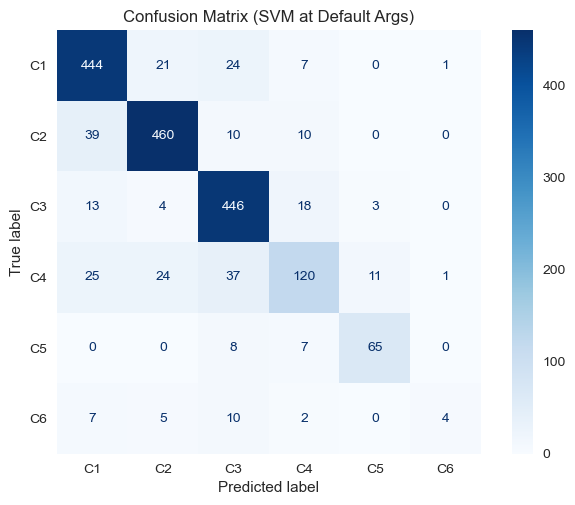

              precision    recall  f1-score   support

          C1       0.84      0.89      0.87       497
          C2       0.89      0.89      0.89       519
          C3       0.83      0.92      0.88       484
          C4       0.73      0.55      0.63       218
          C5       0.82      0.81      0.82        80
          C6       0.67      0.14      0.24        28

    accuracy                           0.84      1826
   macro avg       0.80      0.70      0.72      1826
weighted avg       0.84      0.84      0.84      1826

Classifier Model Score for SVM (RBF and Default Args): 0.8428258488499453


In [33]:
# Separating features and target
# For SVM, the scaled df should now be used
# Our model score (accuracy) for the unscaled data is 76%
# vs the model score (accuracy) for the scaled data is 84%
X = df_scaled
# Target is converted to numpy array
# and flattened to prevent vector errors
y = last_n_column.to_numpy()
y = y.flatten()

# Train test split with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=222)

# SVM with radial basis function kernel and default args
# default_cost = 1.0
# default_gamma = 1 / (440)

clf = SVC(kernel='rbf', random_state=222)
clf.fit(X_train, y_train)

# Predicting test values
y_pred = clf.predict(X_test)

# Confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
display = plot_confusion_matrix(clf, X_test, y_test,
                                display_labels=['C1','C2','C3','C4','C5','C6'],
                                cmap=plt.cm.Blues,
                                normalize=None)
display.ax_.set_title("Confusion Matrix (SVM at Default Args)")
plt.grid(False)
plt.show()

print(classification_report(y_test, y_pred, zero_division=1))
print('Classifier Model Score for SVM (RBF and Default Args): ' + repr(clf.score(X_test, y_test)))

In [34]:
# Creating random sample of 5% approx 456 rows
# The gridsearch takes too long to compute if a bigger sample is used
# Gridsearch for cost and gamma hyper-parameters will be performed on the random sample
df_sample = df_original.sample(frac=0.05, random_state=222)

# Separating sample features and sample target
X = df_sample.iloc[:, :-1]
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
# Target is converted to numpy array
# and flattened to prevent vector errors
y = df_sample.iloc[:, -1:]
y = y.to_numpy()
y = y.flatten()

print('Shape of sample features dataset: ', X.shape)

Shape of sample features dataset:  (456, 440)


In [35]:
# define the space of hyperparameters to search
search_space = list()
search_space.append(Real(1e0, 1e2, 'log-uniform', name='C'))
search_space.append(Categorical(['rbf'], name='kernel'))
search_space.append(Real(1e-5, 1e-2, 'log-uniform', name='gamma'))

# Gridsearch and function code adapted from
# https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/

In [36]:
# defining a function used to evaluate the model with a range of parameters
@skopt.utils.use_named_args(search_space)
def evaluate_model(**params):
    # configure the model with specific hyperparameters
    model = SVC(random_state=222)
    model.set_params(**params)
    # define test harness
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=222)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = mean(result)
    # convert from a maximizing score to a minimizing score
    return 1.0 - estimate

# Gridsearch and function code adapted from
# https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/

In [37]:
# WARNING: this cell takes an exceptionally long time to compute
# Trial and error was used to refine the search as best as possible
# before using the gridsearch to look for values with more precision

# performing optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % result.x)

# TRIAL AND ERROR RESULTS
# Cost hyperparameter results
# 4.158609653247986, 10.0, 3.8701903664145325, 4.249725430370006, 4.045573797504473

# Gamma hyperparameter results
# 0.0005262044932818141, 0.0004675766494834925, 0.0013352318669931221, 0.001348136664940889, 0.0013296450200981475,

# SVM model test Score results
# 0.657, 0.8493, 0.8505, 0.8498


# Old gridsearch code
# Set up range to look for parameters in
# C_array = np.arange(0.1, 10.1, 0.5)
# gamma_array = np.arange(0.01, 0.1, 0.01)
# print(C_array, gamma_array)
# Set up parameter grid
# param_grid = {'C': C_array,
#               'gamma': gamma_array}
# Gridsearch
# grid = GridSearchCV(clf, param_grid, cv=7)
# Fit model to parameters
# grid.fit(X, y)
# Get best parameters
# grid.best_params_

Best Accuracy: 0.791
Best Parameters: [4.66420765648137, 'rbf', 0.0011266508264028915]


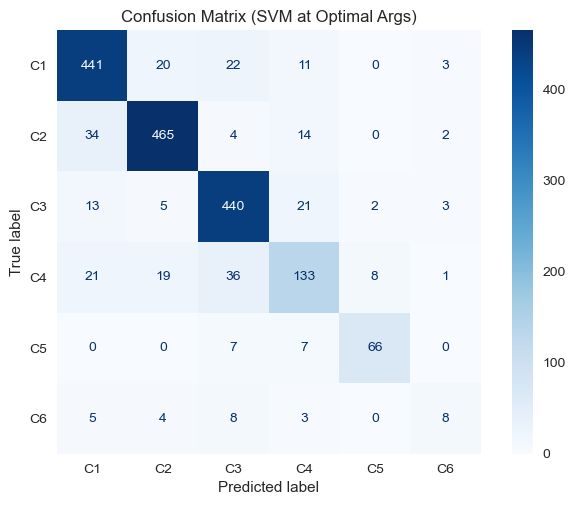

              precision    recall  f1-score   support

          C1       0.86      0.89      0.87       497
          C2       0.91      0.90      0.90       519
          C3       0.85      0.91      0.88       484
          C4       0.70      0.61      0.65       218
          C5       0.87      0.82      0.85        80
          C6       0.47      0.29      0.36        28

    accuracy                           0.85      1826
   macro avg       0.78      0.74      0.75      1826
weighted avg       0.85      0.85      0.85      1826

Classifier Model Score for SVM (rbf and optimal args): 0.8504928806133626


In [38]:
# Separating features and target
X = df_scaled
# Target is converted to numpy array
# and flattened to prevent vector errors
y = last_n_column.to_numpy()
y = y.flatten()

# Train test split with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=222)

# SVM with radial basis function kernel with optimal cost and gamma values
# found from the gridsearch
clf = SVC(kernel='rbf', C=4.249725430370006,
          gamma=0.0013296450200981475, random_state=222)
clf.fit(X_train, y_train)

# Predicting test values
y_pred = clf.predict(X_test)

# Confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
display = plot_confusion_matrix(clf, X_test, y_test,
                                display_labels=['C1','C2','C3','C4','C5','C6'],
                                cmap=plt.cm.Blues,
                                normalize=None)
display.ax_.set_title("Confusion Matrix (SVM at Optimal Args)")
plt.grid(False)
plt.show()

print(classification_report(y_test, y_pred, zero_division=1))
print('Classifier Model Score for SVM (rbf and optimal args): ' + repr(clf.score(X_test, y_test)))

# 5444 seems high for the cost hyperparameter,
# it is possible that this is over-fitting the model
# It is very difficult to compute optimal hyperparameter values
# that provide higher accuracy (84%) than the SVC called with default values

Optimising the cost and gamma hyperparameters has the accuracy of the SVM with default args from 84% (84.2%) to 85% (84.9%) with the optimal values of cost and gamma found through the above gridsearch. The number of C6 samples has increased 1 (at a minimum) to 8 now as seen in the confusion matrix. This still indicates imbalanced classes in the dataset. Our optimal cost value was `4.249725430370006` and `0.0013296450200981475` for gamma.